In [108]:
import importlib

In [109]:
import yfinance as yf
import pandas as pd
import random
import numpy as np
import pendulum
from fitness_functions import *
from utils.units import Volume, Dollar

In [110]:
directory_path = r"C:\Users\khann\Documents\Data Science and Financial Technology\Final project\GP_trading_strategies"

In [111]:
#Import the data.
btc_ts = yf.Ticker("BTC-USD").history(start='2016-01-01', end='2023-06-30')


In [112]:
base_columns_list = ['Open', 'High', 'Low', 'Close', 'Volume']

In [113]:
def create_ma_columns(df,column, lag):
    df[f"ma_{column.lower()}_{lag}"]= df[column].rolling(window = lag).mean()
    return df

def create_lagged_columns(df, column, lag):
    df[f"lag_{column.lower()}_{lag}"]= df[column].shift(lag)
    return df

def create_percentage_of_value(df, column, percentage:float = random.random()):
    df[f"percentage_{column.lower()}_{(round(percentage*100))}"]= df[column]*percentage
    return df

def create_difference(df, column1:str = "low", column2:str = "high"):
    df[f"difference_{column1.lower()}_{column2.lower()}"]= df[column2]-df[column1]
    return df

In [114]:
# Add columns to df:
for column in base_columns_list:
    for lag in range(2,50):
        create_ma_columns(df = btc_ts,column=column, lag = lag)
    for lag in range(1,50):
        create_lagged_columns(df = btc_ts,column=column, lag = lag)
    for lag in range(10):
        create_percentage_of_value(df = btc_ts,column=column)

/tmp/ipykernel_191873/3535242035.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"lag_{column.lower()}_{lag}"]= df[column].shift(lag)
/tmp/ipykernel_191873/3535242035.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"lag_{column.lower()}_{lag}"]= df[column].shift(lag)
/tmp/ipykernel_191873/3535242035.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) in

In [115]:
def pre_process(df):
    """Remove nulls and columns from the DF."""
    null_rows = df.isna().sum(axis=1)[df.isna().sum(axis=1)!=0]
    null_row_indices = list(null_rows.index)
    df.drop(null_row_indices,inplace=True)
    # sum(df.isna().sum(axis=1))
    df.drop(['Dividends','Stock Splits'], axis=1,inplace = True)
    return df

In [116]:
btc_ts = pre_process(btc_ts)

In [117]:
btc_ts.head()

,Open,High,Low,Close,Volume,ma_open_2,ma_open_3,ma_open_4,ma_open_5,ma_open_6,...,lag_volume_41,lag_volume_42,lag_volume_43,lag_volume_44,lag_volume_45,lag_volume_46,lag_volume_47,lag_volume_48,lag_volume_49,percentage_volume_5
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-19 00:00:00+00:00,422.730011,423.104004,417.604004,420.785004,55711300,419.651001,415.652669,412.097504,411.191602,408.148336,...,32278000.0,56993000.0,87562200.0,34042500.0,34522600.0,38477500.0,39633800.0,30096600.0,36278900.0,2.924612e+06
2016-02-20 00:00:00+00:00,421.601013,441.984009,421.601013,437.164001,93992096,422.165512,420.301005,417.139755,413.998206,412.926503,...,35995900.0,32278000.0,56993000.0,87562200.0,34042500.0,34522600.0,38477500.0,39633800.0,30096600.0,4.934195e+06
2016-02-21 00:00:00+00:00,437.773010,448.045990,429.076996,438.798004,89820704,429.687012,427.368011,424.669006,421.266406,417.960673,...,40450000.0,35995900.0,32278000.0,56993000.0,87562200.0,34042500.0,34522600.0,38477500.0,39633800.0,4.715214e+06
2016-02-22 00:00:00+00:00,438.989014,439.045013,432.916992,437.747986,85385200,438.381012,432.787679,430.273262,427.533008,424.220174,...,115607000.0,40450000.0,35995900.0,32278000.0,56993000.0,87562200.0,34042500.0,34522600.0,38477500.0,4.482369e+06
2016-02-23 00:00:00+00:00,438.255005,439.858002,417.821014,420.735992,85244896,438.622009,438.339010,434.154510,431.869611,429.320007,...,173888000.0,115607000.0,40450000.0,35995900.0,32278000.0,56993000.0,87562200.0,34042500.0,34522600.0,4.475004e+06


In [118]:
volume_columns = [col  for col in btc_ts.columns if "volume" in col.lower()]
dollar_columns = [col  for col in btc_ts.columns if "volume" not in col.lower()]

In [119]:
btc_train = btc_ts[:"2021-06-30"]
btc_test = btc_ts["2021-06-30":]

# Genetic Program

In [120]:
from deap import gp, creator, base, tools
from deap.gp import Terminal
import operator
from operator import or_, and_, gt
from fitness_functions import *
import fitness_functions
from utils.plot_decision_trees import plot_tree



In [121]:
arg_names = list(btc_train.columns)
vol_args = [arg for arg in arg_names if "volume" in arg.lower()]
dol_args = [arg for arg in arg_names if "volume" not in arg.lower()]

In [122]:
# --- CREATE PRIMITIVE SETS AND TOOLS -----

n_args=len(arg_names)
pset = gp.PrimitiveSetTyped("main",[Volume]*len(vol_args) + [Dollar]*len(dol_args),bool)
#Rename the arguments:
arg_vol_mapping = {f"ARG{ind}": val for ind,val in enumerate(vol_args)}
pset.renameArguments(**arg_vol_mapping)
arg_dol_mapping = {f"ARG{len(vol_args)+ind}": val for ind,val in enumerate(dol_args)}
pset.renameArguments(**arg_dol_mapping)
#Check that all arguments were renamed:
unnamed_args=[i for i in pset.arguments if "ARG" in i]
if  unnamed_args:
    print(f"Some arguments were not renamed: {unnamed_args}")
pset.addPrimitive(gt, [Dollar,Dollar],bool)
pset.addPrimitive(lambda x:x ,[Dollar],Dollar, name="dollar placeholder")

pset.addPrimitive(gt, [Volume,Volume],bool)
pset.addPrimitive(lambda x:x ,[Volume],Volume, name="volume placeholder")


#Boolean operators:
pset.addPrimitive(and_, [bool,bool],bool)
pset.addPrimitive(or_,[bool,bool],bool)

for v_arg in vol_args:
        pset.addTerminal(v_arg,Volume)
for d_arg in dol_args:
        pset.addTerminal(d_arg,Dollar)

# --- Remove all the ARG terminals ---
pset.terminals[Volume] = [i for i in pset.terminals[Volume] if "ARG" not in i.name]
pset.terminals[Dollar] = [i for i in pset.terminals[Dollar] if "ARG" not in i.name]

### Run the GP:

In [123]:
def generate(pset):
    run=True
    while run:
        try:
            expr = toolbox.individual()            
            #Remove all the Lambda functions:
            expr=  list(filter(lambda x: x.name!="dollar placeholder", expr))
            expr=  list(filter(lambda x: x.name!="volume placeholder", expr))
            if len(expr)>3:
                run=False
        except IndexError:
            continue
    # return gp.PrimitiveTree(expr)
    return creator.Individual(expr)

In [124]:
# --- GP OPERATORS ----

creator.create("fitness", base.Fitness, weights=(1,))
creator.create("Individual", gp.PrimitiveTree, fitness= creator.fitness)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=5)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("custom_individual",generate, pset)
toolbox.register("population", tools.initRepeat, list, toolbox.custom_individual)

expr1 = toolbox.custom_individual()
expr1

plot_tree(expr1)

/home/khann/masters/venv/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/khann/masters/venv/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [125]:
pop = toolbox.population(n=100)
pop

[[<deap.gp.Primitive at 0x7bf18edbb970>,

In [126]:
def cxSubTree(ind1,ind2):
    def get_sub_trees(ind):
        """"Create a dictionary containing the terminal sub-trees and the their starting index in the decision tree."""
        ind_subs = []
        for i in range(0,len(ind)):
            if [elem.arity for elem in ind][i:i+3]==[2,0,0]:
                ind_subs.append({
                    "start_index":i,
                    "primitive":[elem for elem in ind][i:i+3]
                    })
        return ind_subs

    r1 = random.randrange(0,len(get_sub_trees(ind1)))
    r2 = random.randrange(0,len(get_sub_trees(ind2)))

    i1= get_sub_trees(ind1)[r1]["start_index"]
    i2= get_sub_trees(ind2)[r2]["start_index"]

    ind1c = ind1.copy()
    ind1[i1:i1+3] = get_sub_trees(ind2)[r2]["primitive"]
    ind2[i2:i2+3] = get_sub_trees(ind1c)[r1]["primitive"]

    return ind1, ind2

## Building Out trading strategy:

Assume purchases are done at the "Open" price of following day:

In [127]:
signal_df = pd.DataFrame(index = btc_train.index)
signal_df["Open"] = btc_train['Open']

## Calculate the MDD of a trade:

In [128]:
expr=pop[2]
expr1=pop[3]

ind=len(expr)-6
print(str(gp.PrimitiveTree(expr)))
print(str(gp.PrimitiveTree(expr[ind:])))
print([i.name for i in expr])
print([type(i) for i in expr])
print([i.arity for i in expr[ind:]])
plot_tree(expr,name="tree")
s=len(expr)

print("\n",'--'*30)

ind1=4
print(str(gp.PrimitiveTree(expr1)))
print(str(gp.PrimitiveTree(expr1[ind1:])))
print([i.name for i in expr1])
print([type(i) for i in expr1])
print([i.arity for i in expr[ind1:]])
plot_tree(expr1,name="tree1")

s1=len(expr1)

or_(gt('ma_close_2', 'ma_open_33'), gt('ma_low_9', 'lag_low_41'))
gt('ma_low_9', 'lag_low_41')
['or_', 'gt', 'ma_close_2', 'ma_open_33', 'gt', 'ma_low_9', 'lag_low_41']
[<class 'deap.gp.Primitive'>, <class 'deap.gp.Primitive'>, <class 'deap.gp.Terminal'>, <class 'deap.gp.Terminal'>, <class 'deap.gp.Primitive'>, <class 'deap.gp.Terminal'>, <class 'deap.gp.Terminal'>]
[2, 0, 0, 2, 0, 0]

 ------------------------------------------------------------
and_(gt('ma_volume_6', 'ma_volume_5'), gt('ma_open_19', 'lag_low_3'))
gt('ma_open_19', 'lag_low_3')
['and_', 'gt', 'ma_volume_6', 'ma_volume_5', 'gt', 'ma_open_19', 'lag_low_3']
[<class 'deap.gp.Primitive'>, <class 'deap.gp.Primitive'>, <class 'deap.gp.Terminal'>, <class 'deap.gp.Terminal'>, <class 'deap.gp.Primitive'>, <class 'deap.gp.Terminal'>, <class 'deap.gp.Terminal'>]
[2, 0, 0]


In [129]:
cross = len(expr)-3
print([type(i) for i in expr[cross:]][:2])

[<class 'deap.gp.Primitive'>, <class 'deap.gp.Terminal'>]


In [130]:
expr=pop[1]
expr1=pop[3]
sl = 1
cross = s-sl
cross1= s1-sl
print([i.name for i in expr[-sl:]])

print([i.name for i in expr1[-sl:]])


print([type(i) for i in expr[-sl:]] == [type(i) for i in expr1[-sl:]])
expr2 = expr.copy()
expr2[-sl:]=expr1[cross1:]
print(str(gp.PrimitiveTree(expr2)))

type(expr[2]) == type(expr1[3])
plot_tree(expr2, name="offspring")

['lag_volume_18']
['lag_low_3']
True
or_(or_(gt('lag_volume_31', 'ma_volume_29'), gt('lag_high_28', 'ma_close_43')), and_(gt('lag_volume_42', 'lag_volume_13'), gt('lag_volume_47', 'lag_low_3')))


In [131]:
import deap
ind =5
print(expr[ind:] )
print([i for i in expr[ind:] if type(i)==deap.gp.Primitive])
print(str(gp.PrimitiveTree(expr[ind:])))
print('-'*40)
print(expr1[ind:] )
print([i for i in expr1[ind:] if type(i)==deap.gp.Primitive])
print(str(gp.PrimitiveTree(expr1[ind:])))

if not [i for i in expr[ind:] if type(i)==deap.gp.Primitive] and not [i for i in expr1[ind:] if type(i)==deap.gp.Primitive]:
    print(True)
else:
    print(False)


[<deap.gp.Primitive object at 0x7bf1929c27f0>, <deap.gp.Terminal object at 0x7bf1901be440>, <deap.gp.Terminal object at 0x7bf1901c0d00>, <deap.gp.Primitive object at 0x7bf18f7c3a10>, <deap.gp.Primitive object at 0x7bf18ed5c180>, <deap.gp.Terminal object at 0x7bf18e37b580>, <deap.gp.Terminal object at 0x7bf18e37ae40>, <deap.gp.Primitive object at 0x7bf18ed5c180>, <deap.gp.Terminal object at 0x7bf18e37b6c0>, <deap.gp.Terminal object at 0x7bf18e37af80>]
[<deap.gp.Primitive object at 0x7bf1929c27f0>, <deap.gp.Primitive object at 0x7bf18f7c3a10>, <deap.gp.Primitive object at 0x7bf18ed5c180>, <deap.gp.Primitive object at 0x7bf18ed5c180>]
and_(gt('lag_volume_42', 'lag_volume_13'), gt('lag_volume_47', 'lag_volume_18'))
----------------------------------------
[<deap.gp.Terminal object at 0x7bf18e37bd00>, <deap.gp.Terminal object at 0x7bf1901bf680>]
[]
'lag_low_3'
False


## Maximum theoretical profit:

In [132]:

mtv = maximum_theoretical_value(df = btc_train)
mtv

np.float64(357092212810.1182)

In [133]:
from deap import base, creator, tools, gp, algorithms

In [141]:
toolbox.register("evaluate", fitness_function, df=btc_train, tc=0.01, pset=pset)

In [142]:
#Mutate entire branch:
def mutBranch(individual, pset, max_per_mutate=50):
    """Replaces a randomly chosen primitive from *individual* by a randomly
    chosen primitive with the same number of arguments from the :attr:`pset`
    attribute of the individual.

    :param individual: The normal or typed tree to be mutated.
    :returns: A tuple of one tree.
    """
    if len(individual) < 2:
        return individual,

    if (max_per_mutate*len(individual)/100) > 1 :
        "If the percentage of nodes that may be mutated is more than one randomly get the index."
        index=0
        while (len(individual) - index) > (max_per_mutate*len(individual)/100):
            "Ensure that maximum mutation portion is not exceeded."
            index = random.randrange(1, len(individual))
    else:
        index = len(individual)
    
    for i in range(index,len(individual)):
        node = individual[i]
        if node.arity == 0:  # Terminal
            term = random.choice(pset.terminals[node.ret])
            individual[i] = term
        else:  # Primitive
            prims = [p for p in pset.primitives[node.ret] if p.args == node.args]
            individual[i] = random.choice(prims)

    return individual,

def mutation_half(individual,mut_per, pset):
    if random.random()<0.5:
        return gp.mutNodeReplacement(individual, pset = pset)
    else:
        return mutBranch(individual, max_per_mutate = mut_per, pset=pset)

In [143]:
toolbox.register("mate",       cxSubTree)
toolbox.register("select",     tools.selRanked) 
toolbox.register("mutate",     mutation_half, pset=pset)

In [144]:
hof   = tools.HallOfFame(maxsize=50)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0) 
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

# pop, logbook = algorithms.eaSimple(pop, toolbox,cxpb=0.7, mutpb=0.7, ngen=ngen, stats = stats, halloffame =hof)

In [145]:
from operator import attrgetter
def GPAlgo(population, 
           toolbox, cxpb, 
           mutpb, ngen, 
           elite_pop_size, 
           stats=None,
            halloffame=None, 
            verbose=__debug__
            ):
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    store_generations = {}
    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population)-elite_pop_size)

        # Vary the pool of individuals
        # assert (cxpb + mutpb) <= 1.0, (
        # "The sum of the crossover and mutation probabilities must be smaller "
        # "or equal to 1.0.")

        #Elitism:
        elite_pop = sorted(population, key=attrgetter("fitness"), reverse=True)[:elite_pop_size]
        # offspring = [toolbox.clone(ind) for ind in population]
        offspring = elite_pop +offspring

        # Apply crossover and mutation on the offspring
        for i in range(elite_pop_size+1, len(offspring)):
            if random.random() < cxpb:
                bi = random.randint(elite_pop_size+1, len(offspring)-1)
                offspring[bi], offspring[i] = toolbox.mate(offspring[bi],
                                                            offspring[i])
                del offspring[bi].fitness.values, offspring[i].fitness.values

        for i in range(elite_pop_size+1, len(offspring)):
            if random.random() < mutpb:
                mut_per = ((ngen+1-gen)/(ngen+1-gen))*100
                # print("Before Mut:",str(gp.PrimitiveTree(offspring[i])))
                offspring[i], = toolbox.mutate(offspring[i], mut_per=mut_per)
                # print("After Mut:",str(gp.PrimitiveTree(offspring[i])))
                del offspring[i].fitness.values

        elits_check = []
        for ind,val in enumerate(population):
            elits_check.append(val == offspring[ind])
        # print(elits_check)
        print(sum(elits_check))
        # print(len([i for i in pop if i in offspring]))
        # print("Unique items in pop",set(pop), ' of ',len(pop))


        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)

        # Replace the current population by the offspring
        store_generations[f"gen{gen}"]={
            "pop":population,
            "offspring":offspring
        }
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook, store_generations

In [146]:
from operator import attrgetter
len(sorted(pop, key=attrgetter("fitness"), reverse=True)[:10])

10

In [147]:
population, logbook, store_generations = GPAlgo(
    pop, 
    toolbox,
    cxpb=0.7, 
    mutpb=0.6, 
    ngen=2, 
    elite_pop_size= 10,
    stats = stats, 
    halloffame =hof
    )

KeyboardInterrupt: 

In [ ]:
function = gp.compile(expr=gp.PrimitiveTree(pop[0]),pset=pset)
function(df = btc_ts)

Date
2016-02-19 00:00:00+00:00     True
2016-02-20 00:00:00+00:00     True
2016-02-21 00:00:00+00:00     True
2016-02-22 00:00:00+00:00     True
2016-02-23 00:00:00+00:00     True
                             ...  
2023-06-25 00:00:00+00:00    False
2023-06-26 00:00:00+00:00    False
2023-06-27 00:00:00+00:00    False
2023-06-28 00:00:00+00:00    False
2023-06-29 00:00:00+00:00    False
Length: 2688, dtype: bool

In [ ]:
sum_same = []

for i in store_generations:
    same =[]
    for  k in range(len(store_generations[i]["pop"])):
        # print(store_generations[i]["pop"][k])
        # print(store_generations[i]["offspring"][k])
        is_same = (store_generations[i]["offspring"][k]==store_generations[i]["pop"] )
        same.append(is_same)
    pop_in_off = [ind in store_generations[i]["offspring"] for ind in store_generations[i]["pop"]]
    print('',pop_in_off)
    print(sum(pop_in_off))
    # print(same) 
    print(sum(same))
    print("----"*10)
    sum_same.append(sum(same))
print(sum_same)

 [True, True, True, True, True, True, True, True, True, True]
10
0
----------------------------------------
 [True, True, True, True, True, True, True, True, True, True]
10
0
----------------------------------------
[0, 0]


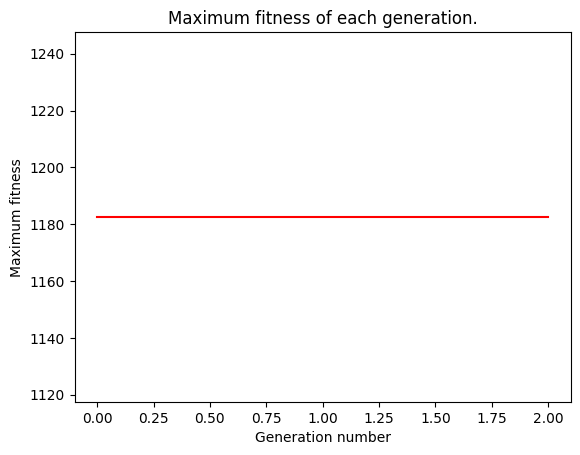

In [36]:
import matplotlib.pyplot as plt

y = [i['max'] for i in logbook]
plt.plot(range(len(y)), y,'r')
plt.title("Maximum fitness of each generation.")
plt.xlabel("Generation number")
plt.ylabel("Maximum fitness")
date = pendulum.now().format('YYYY-MM-DD_hh-mm')
plt.savefig(rf'{directory_path}\graphs\max_fitness\max_fitness_{date}.png')

In [37]:
best_solution = hof.items[0]
tc = 0.01
print("TRAIN")
print("Buy and hold:",(1000/btc_train.iloc[0]['Open'])*btc_train.iloc[-1]['Open']*(1-tc)**2)
print("mtv         :",maximum_theoretical_value(btc_train))
print("strat value :",trading_strat(individual = best_solution, df=btc_train,pset=pset)[0],'\n')

print("TEST")
print("Buy and hold:",(1000/btc_test.iloc[0]['Open'])*btc_test.iloc[-1]['Open']*(1-tc)**2)
print("mtv         :",maximum_theoretical_value(btc_test))
print("strat value :",trading_strat(individual = best_solution, df=btc_test,pset=pset)[0])

TRAIN
Buy and hold: 83253.63449103477
mtv         : 357092212810.1182
strat value : 2885.0584105822563 

TEST
Buy and hold: 821.1862203587319
mtv         : 142111.3274398169
strat value : 455.57131175916186


In [38]:
plot_tree(best_solution)

or_(gt('ma_volume_32', 'ma_volume_10'), or_(gt('ma_volume_42', 'ma_volume_37'), gt('lag_low_35', 'Close')))


<Figure size 1500x700 with 0 Axes>

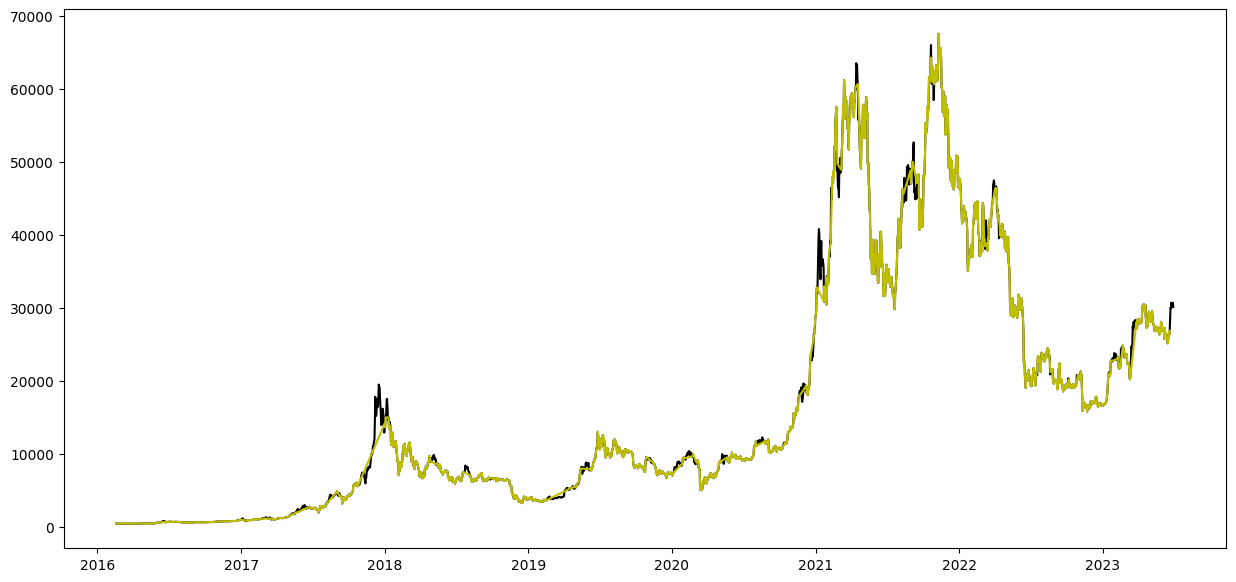

<Figure size 1500x700 with 0 Axes>

In [39]:
#Check best solution:
print(str(best_solution))
plot_tree(expr = best_solution,
          name=f"tree_best_solution_{pendulum.now().format("MM-DD_HH-mm-ss")}")
function = gp.compile(expr=gp.PrimitiveTree(best_solution),pset=pset)
signal_df  = pd.DataFrame(index=btc_ts.index)
signal_df['Signal'] = function(df = btc_ts)
signal_df["Open"] = btc_ts['Open']
plt.figure(figsize=(15,7))
# btc_ts['Open'].plot()
x_btc = list(btc_ts.index)
y_btc = list(btc_ts['Open'])

x_sig = list(signal_df[signal_df['Signal']].index)
y_sig= list(signal_df[signal_df['Signal']]['Open'])
plt.plot(x_btc,y_btc,'k')
plt.plot(x_sig,y_sig,'y')

plt.figure(figsize=(15,7))
# plt.plot(x_btc[-500:],y_btc[-500:],'k')
# plt.plot(x_sig[-500:],y_sig[-500:],'y')

In [40]:
# Get random Profit
def random_trading(df, val = 1000):
    ts_val = [val]
    ts_df = pd.DataFrame(columns = ["value"])
    long=False

    for cnt,row in enumerate(df['Open'].to_frame().iterrows()):
        gd = random.random()
        if  gd<1/3:
            "Try to buy for 33% of the time"
            if long:
                pass
            else:
                shares = ((1-tc)*val)/row[1]['Open']
                long=True
        elif gd <2/3:
            if long:
                val = (1-tc)*shares*row[1]['Open']
                long=False
            else:
                pass       
        else:
            pass
            
            long=False
        if cnt == len(df) and long:
            val = shares*row[1]['Open']
        ts_val.append(val)
        ts_df.loc[row[0]] = val
    return val, ts_val, ts_df


Random trading strategy value:  5.834288366598678


<Axes: >

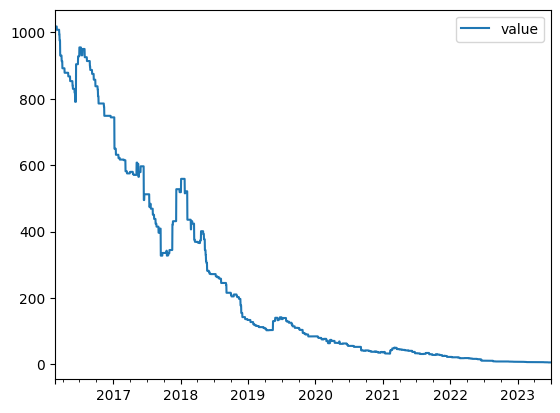

In [41]:
val_r, ts_val_r, ts_df_r = random_trading(btc_ts)
print("Random trading strategy value: ",val_r)
ts_df_r.plot()

In [42]:
btc_train_open = btc_train['Open']
x = btc_train_open.reset_index()['Open']

# Get peaks and troughs
peaks, _ = find_peaks(x)
troughs, _ = find_peaks(-x)

peaks_troughs = list(peaks)+list(troughs)
#Add the enedpoints to the local maximum and minimums.
if 0 not in peaks_troughs:
    peaks_troughs.append(0)
if len(btc_train_open)-1 not in peaks_troughs:
    peaks_troughs.append(len(btc_train_open)-1)

peaks_troughs = sorted(peaks_troughs)
peaks_troughs

#Work out maximum theoretical value using an initial investement of $1000 by default.
profit=0
val = 1000
no_tc_val = 1000
for ind,price in enumerate(btc_train_open.iloc[peaks_troughs]):
    if ind>1 and price > btc_train_open.iloc[peaks_troughs].iloc[ind-1]:
        # Calculate 
        pot_val= (val*price/btc_train_open.iloc[peaks_troughs].iloc[ind-1])*(1-tc)**2
        if pot_val>val:
            val=pot_val        
# no_tc
if ind>1 and price > btc_train_open.iloc[peaks_troughs].iloc[ind-1]:
    no_tc_val = (no_tc_val*price/btc_train_open.iloc[peaks_troughs].iloc[ind-1])

val

np.float64(357092212810.1182)

In [43]:
eth_ts = yf.Ticker("ETH-USD").history(start='2016-01-01', end='2023-06-30')

base_columns_list = ['Open', 'High', 'Low', 'Close', 'Volume']

for column in base_columns_list:
    for lag in range(2,50):
        create_ma_columns(df = eth_ts,column=column, lag = lag)
    for lag in range(1,50):
        create_lagged_columns(df = eth_ts,column=column, lag = lag)
    for lag in range(10):
        create_percentage_of_value(df = eth_ts,column=column)

print("TEST ETH")
print("Buy and hold:",(1000/eth_ts.iloc[0]['Open'])*eth_ts.iloc[-1]['Open']*(1-tc)**2)
print("mtv         :",maximum_theoretical_value(eth_ts))
print("strat value :",trading_strat(individual = best_solution, df=eth_ts, pset=pset)[0])

C:\Users\khann\AppData\Local\Temp\ipykernel_40580\3535242035.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"lag_{column.lower()}_{lag}"]= df[column].shift(lag)
C:\Users\khann\AppData\Local\Temp\ipykernel_40580\3535242035.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"lag_{column.lower()}_{lag}"]= df[column].shift(lag)
C:\Users\khann\AppData\Local\Temp\ipykernel_40580\3535242035.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

TEST ETH
Buy and hold: 5804.989581417405
mtv         : 254384451797431.62
strat value : 308.4154557569073


In [44]:
importlib.reload(fitness_functions)

<module 'fitness_functions' from 'c:\\Users\\khann\\Documents\\Data Science and Financial Technology\\Final project\\GP_trading_strategies\\fitness_functions.py'>

In [45]:
pd.DataFrame({"Population":[[i.name for i in ind] for ind in hof.__dict__['items']]}).to_csv(rf"{directory_path}\hall_of_fame\hof1.csv")

In [46]:
pset.primitives

defaultdict(list,
            {utils.units.Volume: [<deap.gp.Primitive at 0x275c3a45620>],
             utils.units.Dollar: [<deap.gp.Primitive at 0x275c3a45710>],
             bool: [<deap.gp.Primitive at 0x275c3a45800>,
              <deap.gp.Primitive at 0x275c3a456c0>]})

In [47]:
deap.tools.support.HallOfFame

deap.tools.support.HallOfFame

In [48]:
logbook

[{'gen': 0,
  'nevals': 10,
  'avg': array([401.6947086]),
  'std': array([421.11220388]),
  'min': array([78.22092098]),
  'max': array([1182.5655218])},
 {'gen': 1,
  'nevals': 0,
  'avg': array([401.6947086]),
  'std': array([421.11220388]),
  'min': array([78.22092098]),
  'max': array([1182.5655218])},
 {'gen': 2,
  'nevals': 0,
  'avg': array([401.6947086]),
  'std': array([421.11220388]),
  'min': array([78.22092098]),
  'max': array([1182.5655218])}]

In [49]:
import pickle

with open(".\hall_of_fame\hof.pkl", 'wb') as file:
    # Serialize the object and write it to the file
    pickle.dump(hof, file)


<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
C:\Users\khann\AppData\Local\Temp\ipykernel_40580\380831281.py:3: SyntaxWarning: invalid escape sequence '\h'
  with open(".\hall_of_fame\hof.pkl", 'wb') as file:


In [51]:
hof.items

[[<deap.gp.Primitive at 0x275c3a456c0>,

In [56]:
import os
date = pendulum.now().format('YYYY-MM-DD_hh-mm')
folder_name = rf'.\results\run_{date}'
os.makedirs(folder_name)

In [57]:
t1 = pendulum.now()

In [61]:
t2=pendulum.now()

In [62]:
(t2-t1).seconds

25

In [65]:
str(hof.items[1])

"or_(gt('lag_volume_26', 'ma_volume_15'), gt('ma_volume_20', 'lag_volume_23'))"

In [66]:
pendulum.now().format("YYYYMMDD_hh-mm")


'20240803_09-20'

In [67]:
te=None
f"jdjhfjajh{te}152454"

'jdjhfjajhNone152454'

In [22]:
from operator import attrgetter

In [106]:
s_inds = sorted(pop, key=attrgetter('fitness'), reverse=True)
s_inds_ranked=[]
for val, indi in enumerate(s_inds):
    s_inds_ranked.append((len(s_inds)-val,indi))

sum_s_inds = sum([i[0] for i in s_inds_ranked])
chosen = []
for i in range(len(pop)):
    u = random.random() * sum_s_inds
    sum_ = 0
    for ind in s_inds_ranked:
        sum_ += ind[0]
        if sum_ > u:
            chosen.append(ind)
            break
print(np.mean([i[0] for i in chosen]))
print([i[0] for i in chosen])

71.91
[81, 69, 58, 75, 36, 49, 79, 38, 92, 97, 25, 63, 56, 74, 98, 75, 55, 97, 55, 84, 37, 73, 42, 67, 99, 62, 71, 86, 71, 29, 94, 72, 85, 81, 46, 83, 97, 87, 90, 62, 93, 48, 56, 94, 76, 99, 89, 81, 91, 69, 19, 77, 68, 92, 61, 41, 63, 61, 42, 85, 85, 69, 97, 59, 95, 59, 19, 71, 53, 99, 87, 91, 82, 97, 69, 92, 86, 28, 93, 72, 88, 89, 86, 78, 94, 55, 73, 60, 92, 45, 61, 70, 96, 93, 90, 62, 67, 30, 88, 76]


In [79]:
np.mean([1,2,34])

np.float64(12.333333333333334)

In [30]:
[i[0] for i in s_inds_ranked]

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [107]:
[1,2,4,5]+[89,100]

[1, 2, 4, 5, 89, 100]